Временные ряды. Первая лаба. Шумы

In [10]:

# !pip install sounddevice
# !pip install scipy

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

Генерация Белого шума

*Белый шум* - стационарный шум, спектральные составляющие которого равномерно распределены по всему диапазону задействованных частот. 
В нем частоты всего звукового диапазона, который человеческий слух может воспринять: от 20 до 20 000 Гц.
Другими словами, белый шум – это «смесь» звуков, воспроизводимых одновременно на всех частотах, которые воспринимает наше ухо. 


In [12]:
# Генерация розового шума

# глобальные переменные, которые нам нужны для генерации всех шумов. Можно обойтись и без них.

duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц


In [13]:
# счиетаем, сколько элементов будем генерировать. 
#Не забываем привести к инту, так как и длительность (duration) и частота (sample_rate) могут быть вещественными

num_samples = int(duration * sample_rate)

In [14]:
# генерируем просто белый шум, не озадачиваесь его распределением. И печатаем.

white_noise_simple = np.random.random(num_samples)

print(white_noise_simple)

[0.34204727 0.52218529 0.08350667 ... 0.74054788 0.52974932 0.79302504]


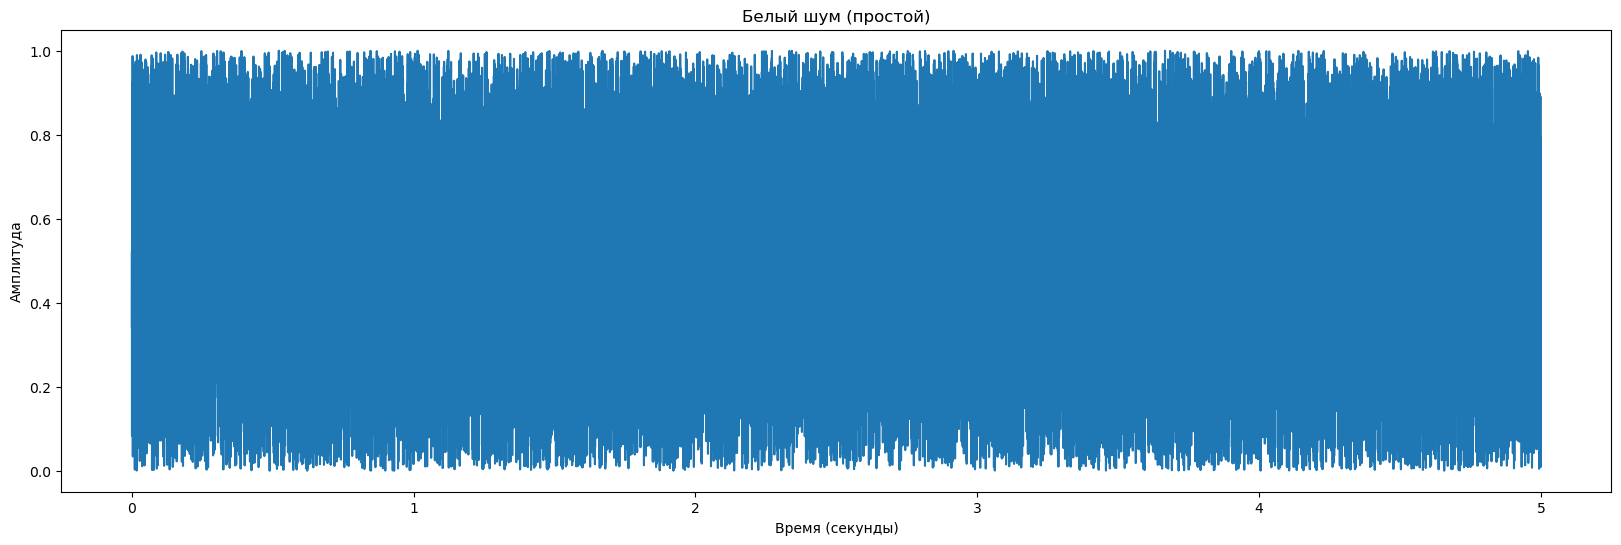

In [15]:
# отрисовываем, что получилось

# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion). 
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(white_noise_simple)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, white_noise_simple)

# заголовки
plt.title('Белый шум (простой)')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()


In [16]:
# слушаем, что получилось
sd.play(white_noise_simple, sample_rate)
sd.wait()

Задание 1. Генерация розового шума, через преобразование Фурье

*Розовый шум* или фликкер (мерцающий) шум - очень похож на белый. 

Розовый шум может быть сгенерирован путем первой генерации сигнала белого шума, преобразования его Фурье, затем деления амплитуд различных частотных составляющих на квадратный корень из частоты (в одном измерении) или на частоту (в двух измерениях) и т.д. Это эквивалентно пространственной фильтрации (свертке) сигнала белого шума с помощью фильтра от белого к розовому. Для сигнала длины N в одном измерении фильтр имеет следующий вид:

In [17]:
# Генерируем розовый шум

fft_result = np.fft.rfft(white_noise_simple)
freq = np.fft.rfftfreq(num_samples, 1/sample_rate)
pink_signal = np.real(fft_result) / np.sqrt(np.abs(freq))
pink_signal[freq == 0] = np.median(pink_signal)
pink_noise = np.fft.ifft(pink_signal)
pink_noise = np.real(pink_noise)

print(pink_noise)

[-0.00930355 -0.00922218 -0.00179681 ... -0.00629856 -0.00179681
 -0.00922218]


C:\Users\kanze\AppData\Local\Temp\ipykernel_23588\3225054099.py:5: RuntimeWarning: divide by zero encountered in divide
  pink_signal = np.real(fft_result) / np.sqrt(np.abs(freq))


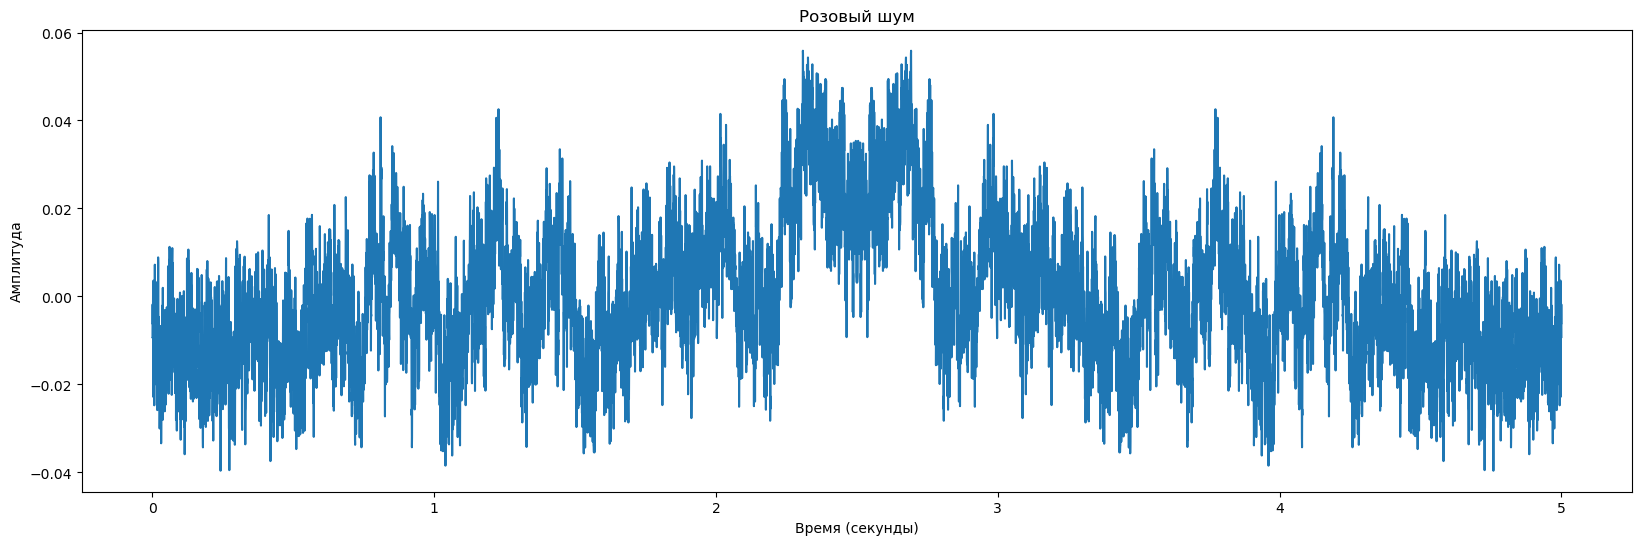

In [18]:
# отрисовываем, что получилось 
# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion). 
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(pink_noise)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, pink_noise)

# заголовки
plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

In [19]:
# слушаем, что получилось
sd.play(pink_noise, sample_rate)
sd.wait()

Задание 2. Генереция черного шума, как абсолютно черного тела при температуре 17 нанокельвинов

In [20]:
import scipy

kb =  scipy.constants.k
h = scipy.constants.physical_constants['Planck constant'][0]
c = scipy.constants.c

print(kb)
print(h)
print(c)

T = 17*1/np.power(10, 9)  #Температура 17 нанокельвинов
G = 10

coef1 = 2*h/(c*c*T*T*T)
coef2 = h/(kb*T)

freq1 = 1000

# количество элементов в записи сигнала. Для 17 нанокельвинов полоса пропускания шума будет от 1Гц до 12 кГц
num_samples = int(duration * freq1)


# Частоты, на которых будем генерировать

black_noise = np.zeros(num_samples)   # подготовили лист для записи сигнала
time_axis = np.arange(num_samples) / sample_rate   # задали временную ось



black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
eq = 10 * np.log(coef1*np.power(freq1,3)/(np.exp(coef2*freq1)-1)) + 10 # эквалайзер

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples) # опять белый шум

black_noise = white_noise_g + eq # применяем преобразование к белому шуму

black_noise /= np.max(np.abs(black_noise))  # Нормализация амплитуды к [-1, 1]

AttributeError: Module 'scipy' has no attribute 'constants'

In [ ]:
# так звучит черное тело

sd.play(black_noise, freq1)
sd.wait()

In [ ]:
# Визуализация
time_axis = np.linspace(0, duration, len(black_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, black_noise)
plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

Задание 3. Генерация временного ряда

In [24]:
duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц

num_points = duration*sample_rate  # количество точек

time_points = np.linspace(0, duration, num_points)  # Создаем равномерные временные точки от 0 до 5 секунд

fft_result = np.fft.rfft(white_noise_simple)
freq = np.fft.rfftfreq(num_samples, 1/sample_rate)
pink_signal = np.real(fft_result) / np.sqrt(np.abs(freq))
pink_signal[freq == 0] = np.median(pink_signal)
pink_noise = np.fft.ifft(pink_signal)
pink_noise = np.real(pink_noise)

# print(pink_noise)

# white_noise_base = np.random.normal(0,0.5,size=num_points)  # Генерим белый шум

values = 10*np.sin(4*time_points*np.pi) # вычисляем амплитуды сигнала по синусоидальному закону

values_noise = values + pink_noise # зашумляем сигнал

C:\Users\kanze\AppData\Local\Temp\ipykernel_23588\4265095463.py:10: RuntimeWarning: divide by zero encountered in divide
  pink_signal = np.real(fft_result) / np.sqrt(np.abs(freq))


ValueError: operands could not be broadcast together with shapes (20500,) (10251,) 

C:\Users\kanze\AppData\Local\Temp\ipykernel_23588\932771121.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c0, c1, c2],


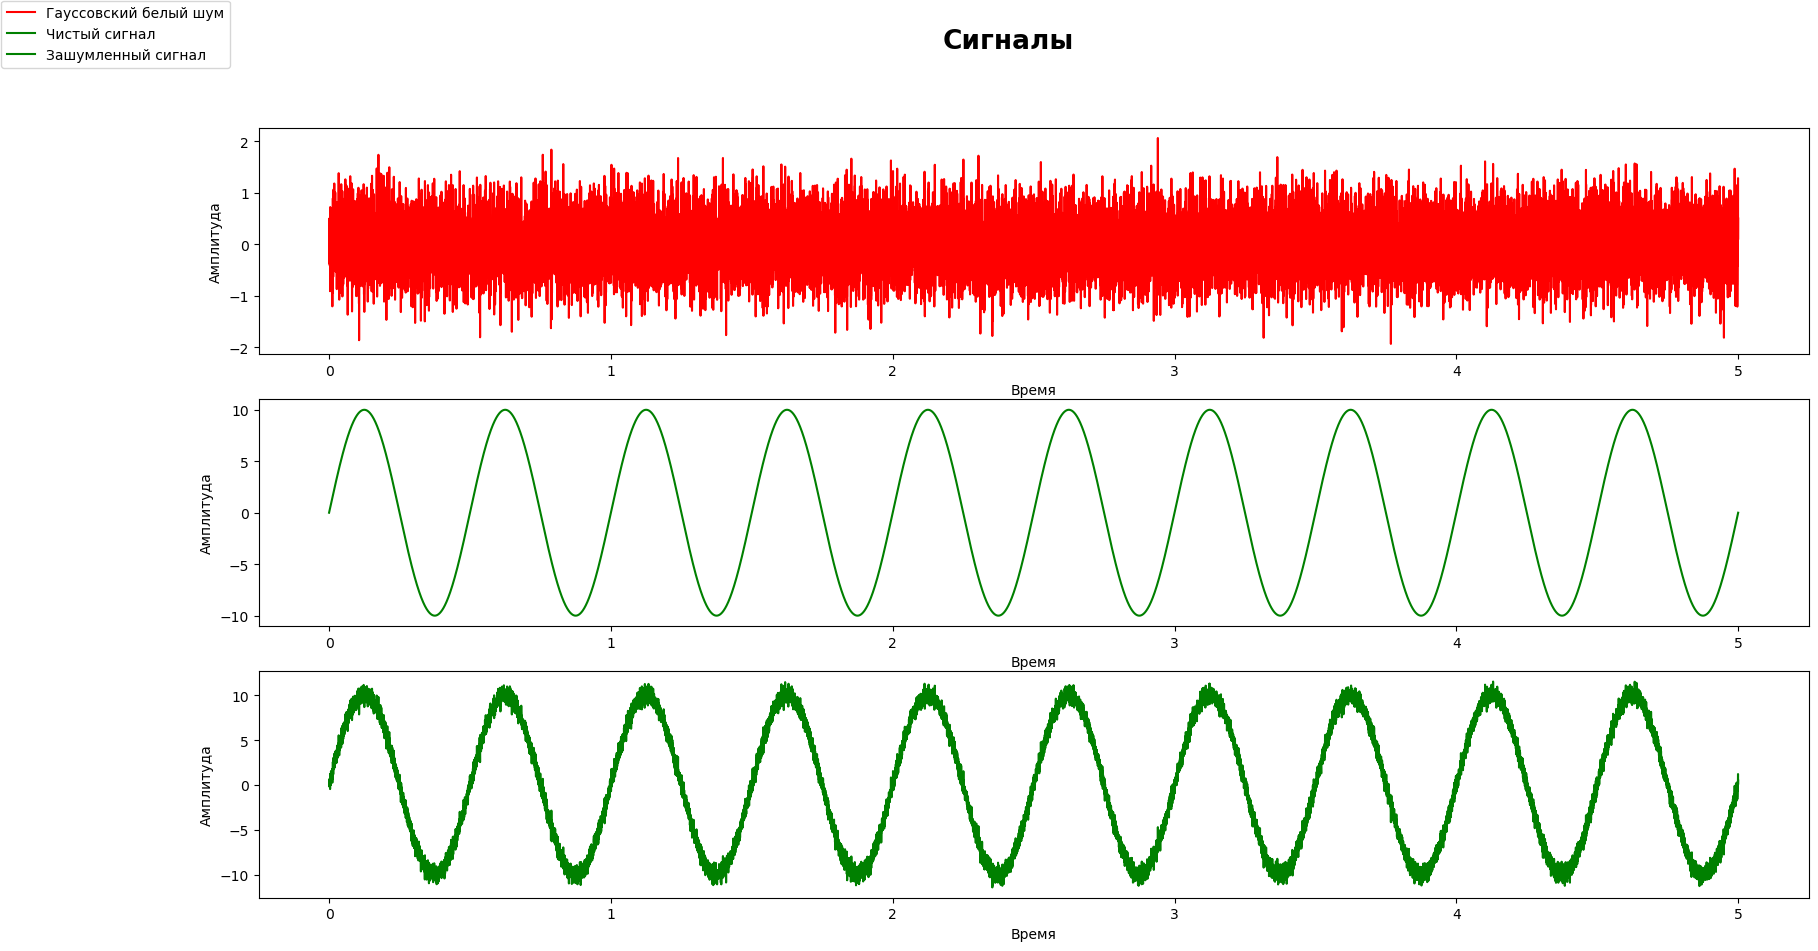

In [ ]:
# Отрисовываем
# хотим нарисовать все на одном рисунке. Нам нужно 3 рисунка, один под другим.
fig, axs = plt.subplots(3, 1, figsize=(20, 10))


# общий заголовок для всей картинки
fig.suptitle('Сигналы', fontsize=19, fontweight='bold')

labels = ["Гауссовский белый шум", "Чистый сигнал", "Зашумленный сигнал"]

# определяем, что будем отрисовывать на 1 графике. По x - время, по y - амплитуды
c0 = axs[0].plot(time_points, white_noise_base, color="red")
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c1 = axs[1].plot(time_points, values, color="green")
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c2 = axs[2].plot(time_points, values_noise, color="green")
axs[2].set_xlabel('Время')
axs[2].set_ylabel('Амплитуда')

# отрисовываем общую легенду
fig.legend([c0, c1, c2],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)